## Problem Statement

With this project, I intend to perform segmentation of customers using GMM algorithm. Customer segmentation is the process of grouping together customers based on similar characteristics. 
What I wish to achieve at the end of this project is to be able to decide what marketing campaign strategy would work for each clusters. The deciding factors are income, age, number of people in the household, the visits made to the store, website, number and total purchases made so far.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


In [2]:
#Reading the data
data = pd.read_csv('marketing_campaign.csv',sep = '\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 2240 rows of data with 29 columns.  

Some columns are related to user information like: ID, Year_Birth, Eductaion, marital_status, Income, Kidhome, teenhome, recency, and complain.  
Few columns like MntWInes, MntFruits, MntMeatProducts, MntFishProducts, MntGoldProds talk about the money spent by customer on wines, fruits, meat, fish, and gold.  
Columns NumDealsPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth talk about the number of visists made by customer or purchases.  
AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2 indicates if customer has accepted campaigns or not. I think we can go ahead and drop these considering the context.

In [4]:
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [5]:
data['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

dropping both these columns as this could be some internal info which does not make much sense right now


In [6]:
data.drop(['Z_CostContact','Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'],axis=1,inplace = True)

In [7]:
data['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [8]:
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Dropping these two columns as well as I believe they dont support the context here. This reduces our dimeniosn of the data aking it slightly better.

In [9]:
data.drop(['Response','Complain'],axis=1,inplace = True)

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

Income has some missing values. Let's impute those values but before doing so, lets just explore the column

/var/folders/rx/0lw0w5ds7t36p51ggtr6fdr80000gn/T/ipykernel_45402/835098283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'])


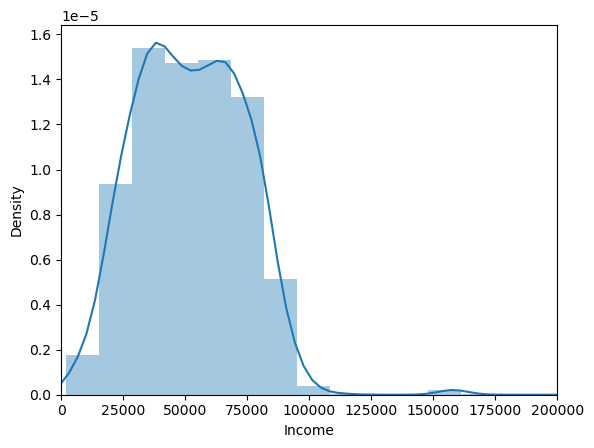

In [11]:
sns.distplot(data['Income'])
plt.xlim(0,200000)
plt.show()

In [12]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

The mean salary is 52247 but the max is 666666 which is definetly an outlier. So instead of imputing with mean we will impute with median since the distribution is left skewed

In [13]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [14]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

Lets look at some more features that are categorical. 

In [15]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Looks like there are some redundant values. We can replace this with a feature that holds the total size of the family.  
For ex, widow would have a family size of 1 + kids if any is reported in kids_home and teen_home. So would single, YOLO, Absurd and divroced. 
And for married and together we could do 2 + kids if any is reported in kids_home and teen_home

In [17]:
data['Family_Size'] = data['Marital_Status'].replace({'Married':2,  "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1, "Alone":1})

In [18]:
import datetime
from datetime import datetime

data['Family_Size'].astype(int)
data['Family_Size'] = data['Family_Size'] + data['Kidhome'] + data['Teenhome']
YearNow = datetime.now().strftime('%Y-%m-%d').split('-')[0]
data['Customer_Age'] = int(YearNow) - data['Year_Birth']

In [19]:
data['Customer_Age'].value_counts()

48     89
53     87
49     83
52     79
46     77
54     77
51     74
59     74
55     71
50     69
68     55
66     53
45     53
72     52
47     52
56     51
65     51
58     50
70     50
69     49
64     49
42     45
61     45
57     44
62     44
67     43
73     43
41     42
38     42
60     42
44     39
43     39
40     38
63     36
71     35
39     32
35     30
75     30
74     29
36     29
37     27
76     21
34     18
78     16
77     16
33     15
32     13
79      8
81      7
80      7
31      5
29      5
30      3
28      2
125     1
83      1
131     1
124     1
84      1
Name: Customer_Age, dtype: int64

There are outliers. We can go ahead and drop them. 

In [20]:
data = data[data['Customer_Age'] <= 80 ]

In [21]:
minSalary = data['Income'].min()
maxSalary = data['Income'].max()

print(f'Minimum salary is {minSalary}')
print(f'Minimum salary is {maxSalary}')

Minimum salary is 1730.0
Minimum salary is 666666.0


In [22]:
data = data[data['Income'] < 600000]
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Family_Size', 'Customer_Age'],
      dtype='object')


In [23]:
data.drop(['Year_Birth','Marital_Status','Kidhome','Teenhome','Recency'],axis=1,inplace = True)

/var/folders/rx/0lw0w5ds7t36p51ggtr6fdr80000gn/T/ipykernel_45402/4120602615.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

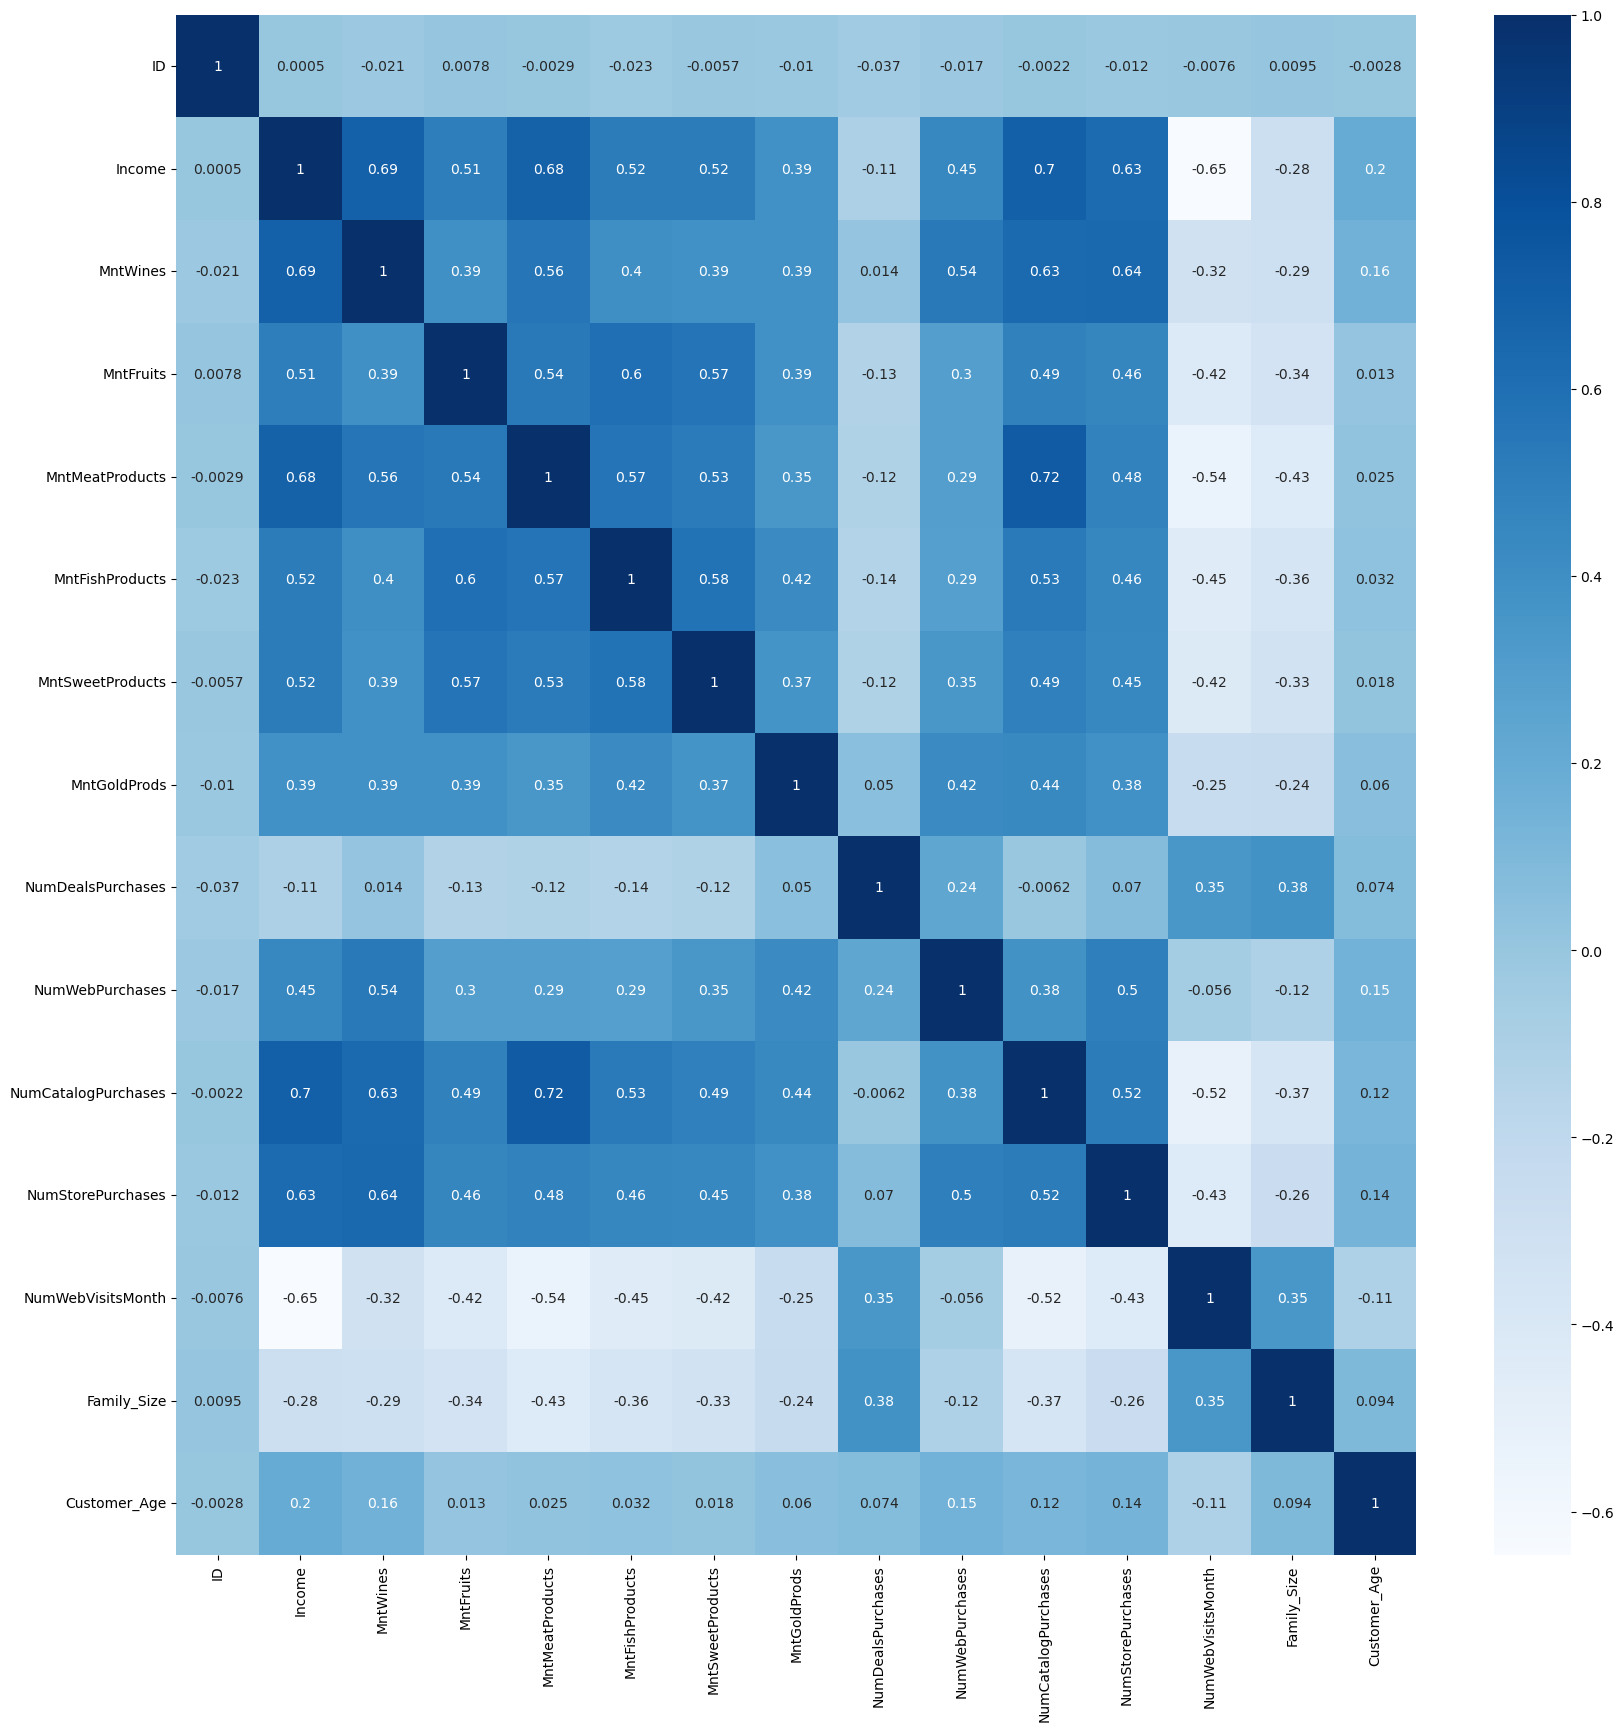

In [24]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap = 'Blues')

In [25]:
bins = np.arange(1000, 190000, 20000)
labels = ['1-21k','21-41k','41-61k','61-81k','81-101k','101-121k','121-141k','141-161k','161-181k']
data['Income_range'] = pd.cut(data['Income'],bins=bins,right = True,include_lowest=True, labels = labels)
data.head()

,ID,Education,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Family_Size,Customer_Age,Income_range
0,5524,Graduation,58138.0,04-09-2012,635,88,546,172,88,88,3,8,10,4,7,1,67,41-61k
1,2174,Graduation,46344.0,08-03-2014,11,1,6,2,1,6,2,1,1,2,5,3,70,41-61k
2,4141,Graduation,71613.0,21-08-2013,426,49,127,111,21,42,1,8,2,10,4,2,59,61-81k
3,6182,Graduation,26646.0,10-02-2014,11,4,20,10,3,5,2,2,0,4,6,3,40,21-41k
4,5324,PhD,58293.0,19-01-2014,173,43,118,46,27,15,5,5,3,6,5,3,43,41-61k


In [26]:
data['Income_range'].value_counts()

41-61k      658
61-81k      624
21-41k      619
81-101k     171
1-21k       143
141-161k      6
101-121k      5
161-181k      1
121-141k      0
Name: Income_range, dtype: int64

In [27]:
income_dummies = pd.get_dummies(data['Income_range'])
income_dummies

,1-21k,21-41k,41-61k,61-81k,81-101k,101-121k,121-141k,141-161k,161-181k
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2235,0,0,0,1,0,0,0,0,0
2236,0,0,0,1,0,0,0,0,0
2237,0,0,1,0,0,0,0,0,0
2238,0,0,0,1,0,0,0,0,0


In [28]:
data_merged = pd.concat([data,income_dummies], axis = 'columns')

In [29]:
data_merged.head()

,ID,Education,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Income_range,1-21k,21-41k,41-61k,61-81k,81-101k,101-121k,121-141k,141-161k,161-181k
0,5524,Graduation,58138.0,04-09-2012,635,88,546,172,88,88,...,41-61k,0,0,1,0,0,0,0,0,0
1,2174,Graduation,46344.0,08-03-2014,11,1,6,2,1,6,...,41-61k,0,0,1,0,0,0,0,0,0
2,4141,Graduation,71613.0,21-08-2013,426,49,127,111,21,42,...,61-81k,0,0,0,1,0,0,0,0,0
3,6182,Graduation,26646.0,10-02-2014,11,4,20,10,3,5,...,21-41k,0,1,0,0,0,0,0,0,0
4,5324,PhD,58293.0,19-01-2014,173,43,118,46,27,15,...,41-61k,0,0,1,0,0,0,0,0,0


In [30]:
data_merged.drop(['Education','Dt_Customer','Income_range'],axis=1, inplace= True)

<Axes: >

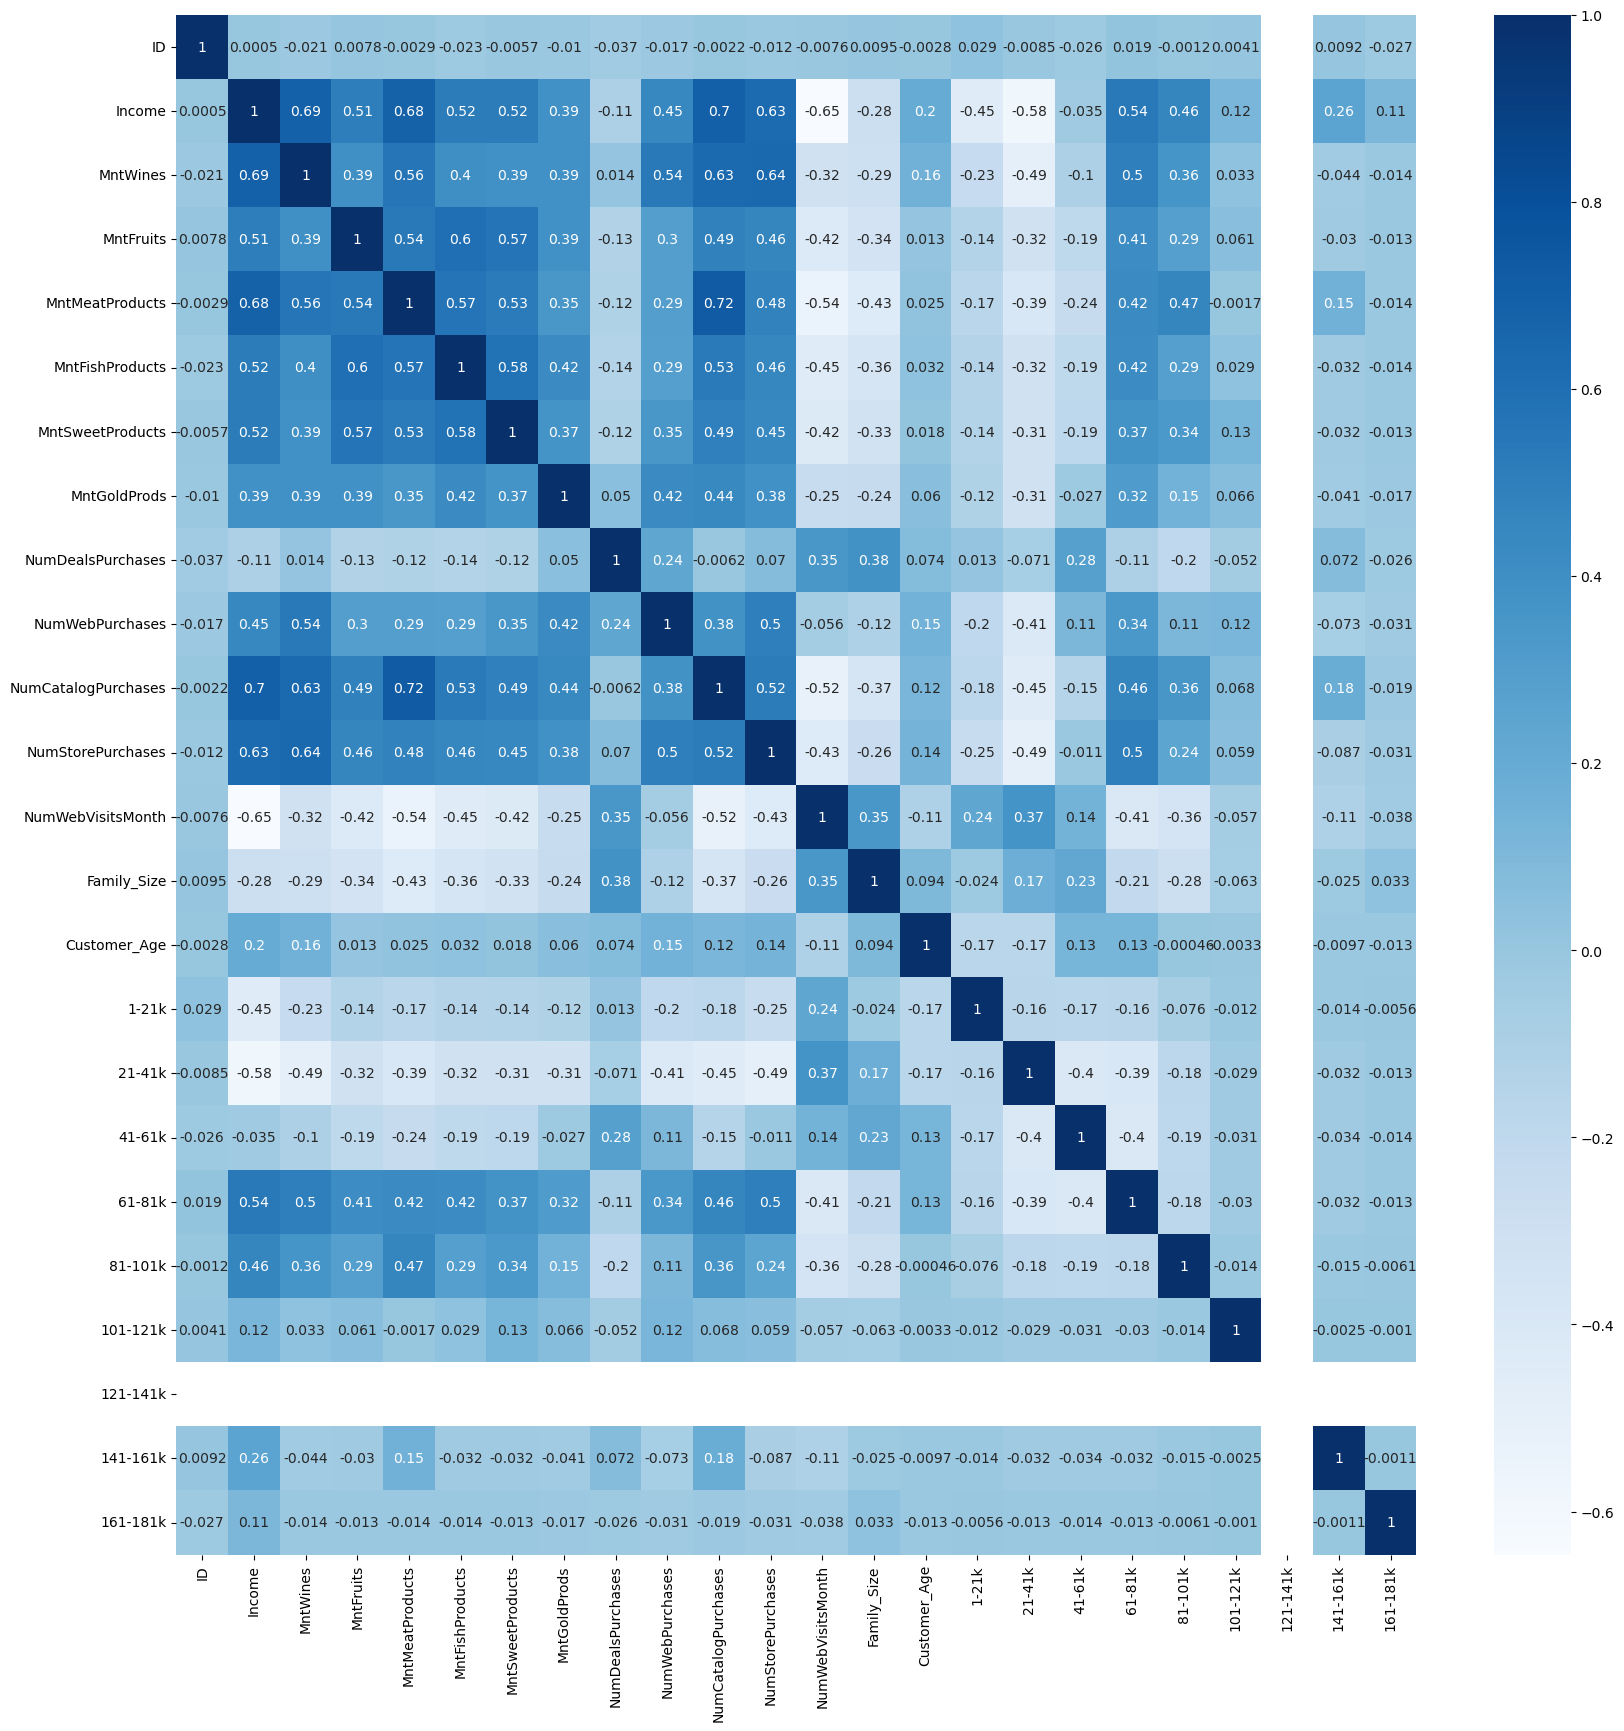

In [31]:
plt.figure(figsize=(20,20))
corr = data_merged.corr()
sns.heatmap(corr,annot=True,cmap = 'Blues')

In [32]:
scaler = StandardScaler()
scaler.fit(data_merged)
scaled_data = pd.DataFrame(scaler.transform(data_merged),columns=data_merged.columns)
                           #columns= ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'])

In [45]:
from sklearn import metrics

Silhouette score for 2 clusters: 0.24372091799917822 
Second score for 2 clusters: 468.7034676879147 
Silhouette score for 3 clusters: 0.25967967816756615 
Second score for 3 clusters: 481.4030078863048 
Silhouette score for 4 clusters: 0.20648008097205006 
Second score for 4 clusters: 400.4473881641707 
Silhouette score for 5 clusters: 0.24372091799917822 
Second score for 5 clusters: 468.7034676879147 
Silhouette score for 6 clusters: 0.20648008097205006 
Second score for 6 clusters: 400.4473881641707 
Silhouette score for 7 clusters: 0.24356636742168652 
Second score for 7 clusters: 469.67048808104477 


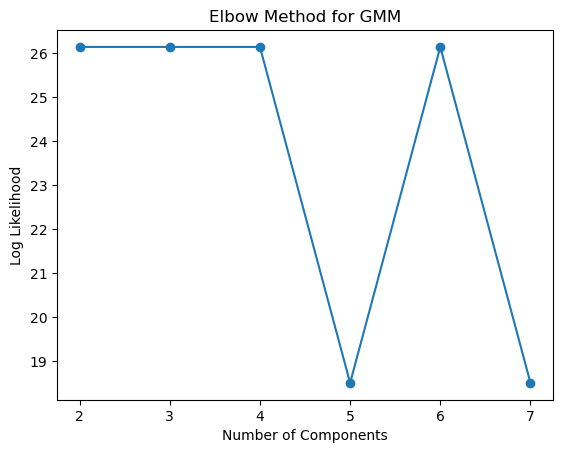

In [55]:
likelihoods = []
cmp_range = range(2,8)

for i in cmp_range:
    gmm = GaussianMixture(n_components = 3) 
    gmm.fit(scaled_data)
    gmm.sample(10)
    labels = GaussianMixture(n_components = 3).fit_predict(scaled_data)
    score = metrics.silhouette_score(scaled_data, labels, metric='euclidean')
    print(f'Silhouette score for {i} clusters: {score} ')
    score2 = metrics.calinski_harabasz_score(scaled_data, labels)
    print(f'Second score for {i} clusters: {score2} ')
    likelihoods.append(gmm.score(scaled_data))

plt.plot(cmp_range, likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.title('Elbow Method for GMM')
plt.show()

In [33]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(scaled_data)

GaussianMixture(n_components=3)

In [34]:
gmm.sample(10)
data_merged['Clusters'] = GaussianMixture(n_components = 3).fit_predict(scaled_data)
data_merged.head()

,ID,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,1-21k,21-41k,41-61k,61-81k,81-101k,101-121k,121-141k,141-161k,161-181k,Clusters
0,5524,58138.0,635,88,546,172,88,88,3,8,...,0,0,1,0,0,0,0,0,0,1
1,2174,46344.0,11,1,6,2,1,6,2,1,...,0,0,1,0,0,0,0,0,0,2
2,4141,71613.0,426,49,127,111,21,42,1,8,...,0,0,0,1,0,0,0,0,0,1
3,6182,26646.0,11,4,20,10,3,5,2,2,...,0,1,0,0,0,0,0,0,0,2
4,5324,58293.0,173,43,118,46,27,15,5,5,...,0,0,1,0,0,0,0,0,0,2


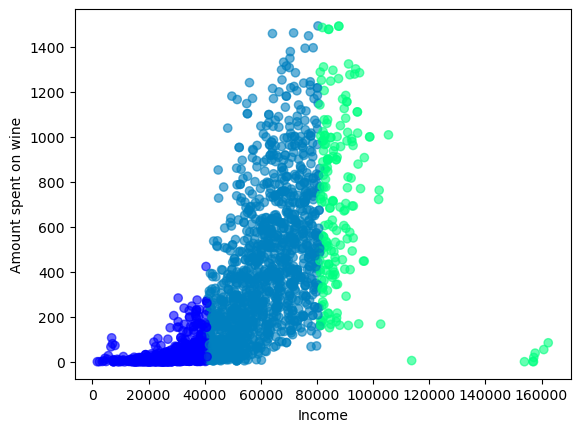

In [35]:
plt.scatter(data_merged['Income'],data_merged['MntWines'],
           c = GaussianMixture(n_components = 3).fit_predict(data_merged), cmap =plt.cm.winter, alpha = 0.6)
plt.xlabel('Income')
plt.ylabel('Amount spent on wine')
plt.show()

In [46]:
metrics.silhouette_score(scaled_data, data_merged['Clusters'], metric='euclidean')

0.27727421634079563

We see that people who earn 400k to 800k spend more on wine than other income bands

In [37]:
data_merged.head()

,ID,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,1-21k,21-41k,41-61k,61-81k,81-101k,101-121k,121-141k,141-161k,161-181k,Clusters
0,5524,58138.0,635,88,546,172,88,88,3,8,...,0,0,1,0,0,0,0,0,0,1
1,2174,46344.0,11,1,6,2,1,6,2,1,...,0,0,1,0,0,0,0,0,0,2
2,4141,71613.0,426,49,127,111,21,42,1,8,...,0,0,0,1,0,0,0,0,0,1
3,6182,26646.0,11,4,20,10,3,5,2,2,...,0,1,0,0,0,0,0,0,0,2
4,5324,58293.0,173,43,118,46,27,15,5,5,...,0,0,1,0,0,0,0,0,0,2


In [38]:
data_merged.columns

Index(['ID', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Family_Size', 'Customer_Age',
       '1-21k', '21-41k', '41-61k', '61-81k', '81-101k', '101-121k',
       '121-141k', '141-161k', '161-181k', 'Clusters'],
      dtype='object')

In [41]:
data_merged['Total Purchase'] = data_merged['MntWines'] + data_merged['MntFruits'] + data_merged['MntMeatProducts'] +data_merged['MntFishProducts'] + data_merged['MntSweetProducts'] + data_merged['MntGoldProds']

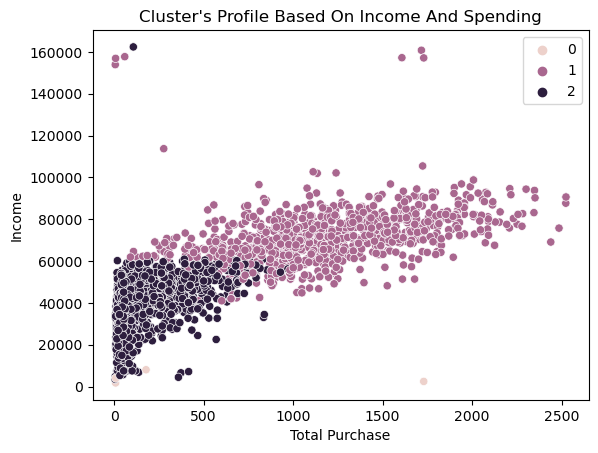

In [42]:
pl = sns.scatterplot(data = data_merged,x=data_merged['Total Purchase'], y=data_merged['Income'],hue=data_merged['Clusters'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

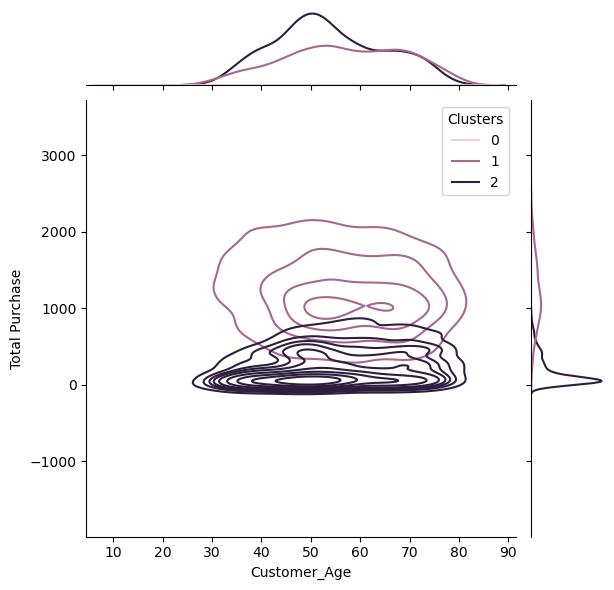

/Users/divyahegde/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

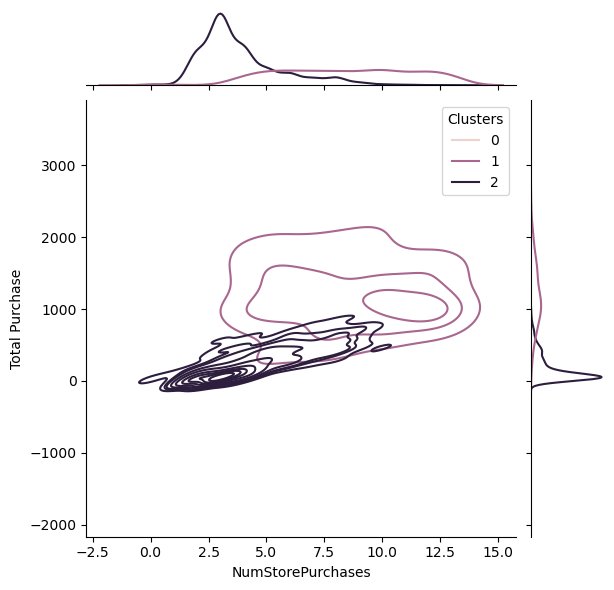

<Figure size 640x480 with 0 Axes>

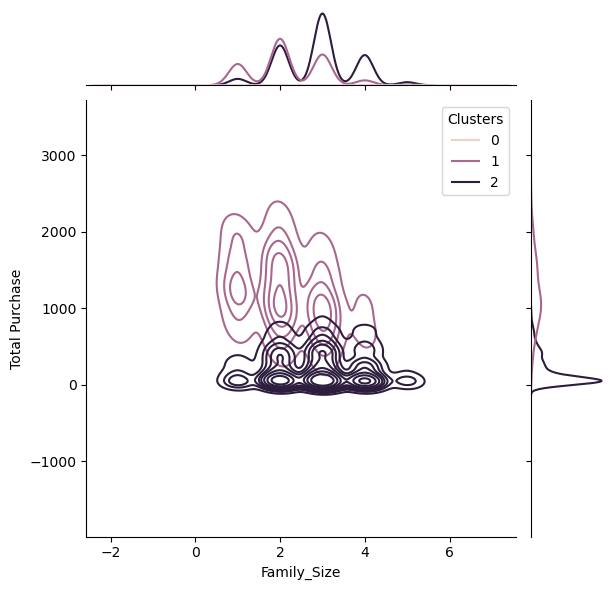

/Users/divyahegde/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

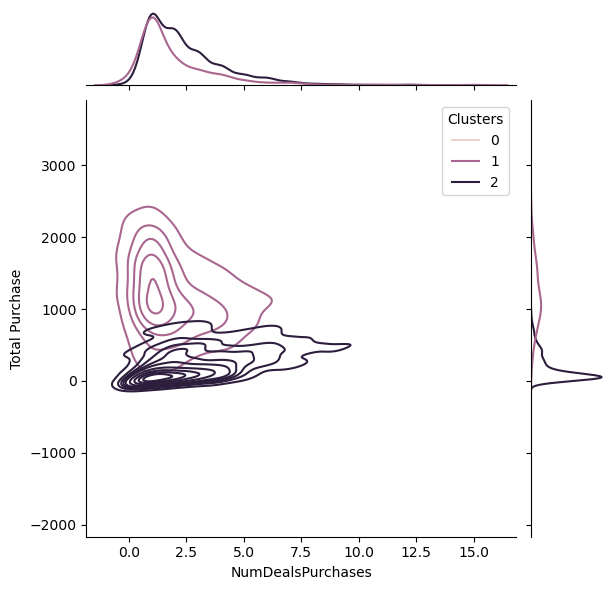

/Users/divyahegde/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

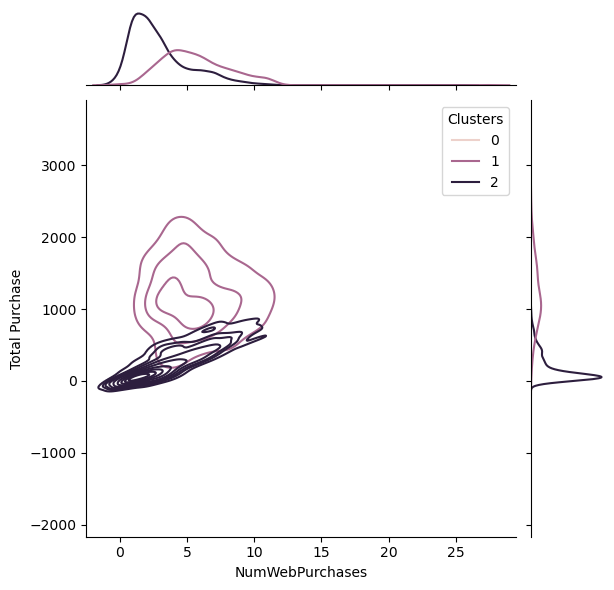

<Figure size 640x480 with 0 Axes>

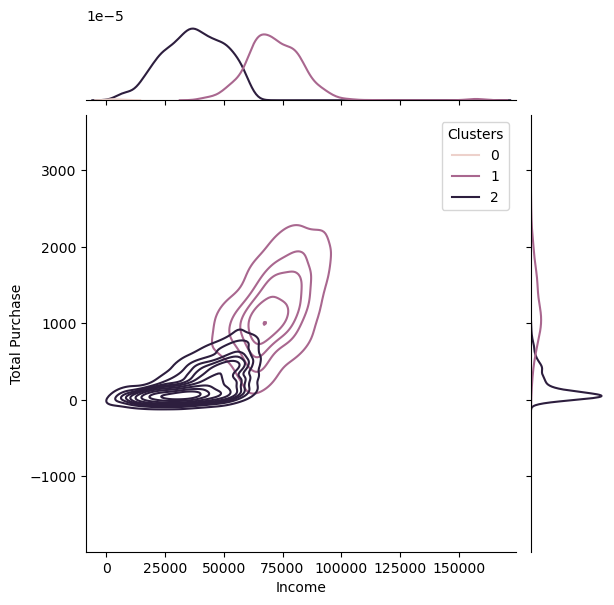

In [44]:
features = ['Customer_Age', 'NumStorePurchases', 'Family_Size', 'NumDealsPurchases','NumWebPurchases','Income']

for i in features:
    plt.figure()
    sns.jointplot(x=data_merged[i], y=data_merged['Total Purchase'], hue =data_merged['Clusters'], kind='kde')
    plt.show()


### Conclusion

Cluster 0: High income group with family size of 1 or 2. This cluster definitely does not shop on the web. So website campaigns do not work. They're not so high on deals either. They have a maximum family size of 1-2, with very few on 3. These people are aged ebtween 40-70.  
  
  
Cluster1: This cluster has a diverse age between 25-80 having family size between 1-5. This cluster's total purchase is the lowest. But they do purchase deals more than cluster0 and are not so keen on web purchases (infact lesser than cluster0). Surprisingly this cluster has a good number of web visits with a mean of 7. This is definietly the low income group.  

Cluster2: This is the mid range income cluster with ages 30-80. This cluster has a normally distributed web visits with mean of around 5. This group seems like does catalog purchases and also is into deal purchases. the family size ranges from 1-4 here and is definely the cluster that visists the store often.

Cluster0 is definitely unbothered by deals or website campaigns.  
Cluster1 is into deals and visits website a lot. hence, we could look at pushing these users some web deals.  
Cluster2 is deinitely into visitng stores and buying deals. We could look at store deals